# Perkenalan

## Latar Belakang

Gagal jantung merupakan suatu kondisi medis serius yang dapat mengancam jiwa, di mana jantung tidak dapat memompa darah secara efisien untuk memenuhi kebutuhan tubuh. Prediksi dini terkait risiko gagal jantung dapat menjadi langkah yang krusial dalam merencanakan intervensi medis dan perawatan yang tepat untuk mencegah dampak serius pada kesehatan seseorang.

Dalam upaya meningkatkan prediksi risiko gagal jantung, proyek ini akan menggunakan dataset "heart_failure_clinical_records_dataset", yang mencakup informasi klinis tentang pasien-pasien dengan gagal jantung. Dataset ini menyediakan sejumlah variabel seperti usia, jenis kelamin, kadar serum kreatinin, kadar serum sodium, dan variabel klinis lainnya yang berkaitan dengan kondisi jantung.

Metode Machine Learning, khususnya Random Forest dan Adaptive Boosting, telah terbukti berhasil dalam meningkatkan akurasi prediksi pada berbagai masalah klasifikasi. Random Forest, dengan kekuatan penggabungan banyak pohon keputusan, mampu menangani kompleksitas dan variabilitas dalam data. Sementara itu, Adaptive Boosting, dengan pendekatan pembelajaran secara berurutan dan memberikan fokus pada kesalahan prediksi sebelumnya, dapat meningkatkan kemampuan model dalam menangkap pola yang sulit dijangkau oleh model sebelumnya.

Proyek ini bertujuan untuk membandingkan kinerja prediktif antara metode Random Forest dan Adaptive Boosting dalam konteks prediksi gagal jantung. Dengan memanfaatkan fitur-fitur klinis yang relevan dari dataset, diharapkan hasil penelitian ini dapat memberikan wawasan yang berharga bagi para profesional medis dalam mengidentifikasi pasien-pasien dengan risiko tinggi gagal jantung. Penerapan model machine learning pada proyek ini diharapkan dapat mendukung langkah-langkah pencegahan dan manajemen yang lebih dini, membantu meningkatkan kualitas hidup dan prognosis pasien yang terkena dampak penyakit ini.

## Informasi Data

**Jumlah Data** <br/>
Jumlah data pada dataset ini terdiri dari 299 baris dan 13 kolom.

**Kelas**<br/>
Dataset ini terdiri dari dua kelas yaitu 0 dan 1 dalam konteks apakah pasien sudah meninggal saat waktu follow-up atau belum.

**Sumber**<br/>
Dataset ini saya dapatkan dari Kaggle:<br/>
[link text](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data)

**Atribut Data**<br/>

1. **age** : umur pasien
2. **anaemia** : apakah ada pengurangan haemoglobin
3. **creatinine_phosphokinase** : level enzim CPK dalam mcg/L
4. **diabetes** : apakah pasien punya riwayat diabetes
5. **ejection_fraction** : persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. **high_blood_pressure** : apakah pasien punya darah tinggi
7. **platelets** : jumlah platelet di darah dalam kiloplatelets/mL
8. **serum_creatinine** ; level serum creatinine di darah dalam mg/dL
9. **serum_sodium** : level serum sodium di darah dalam mEq/L
10. **sex** : apakah pasien pria atau wanita
11. **smoking** : apakah pasien merokok
12. **time** : waktu dalam hari untuk follow-up
13. **DEATH_EVENT** : apakah pasien sudah meninggal saat waktu follow-up

**Objektifitas**

Adapun Objektif yang ingin dicapai:

*   Membangun model machine learning yang dapat memprediksi penyakit gagal jantung.
*   Menilai kinerja model Random Forest dan Adaptive Boosting dalam prediksi penyakit gagal jantung.
*   Menganalisis Performa Model Random Forest dan Adaptive Boosting dalam memprediksi penyakit gagal jantung.

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Dimensi Data**

In [3]:
df.shape

(299, 13)

**Informasi Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Cek Data Duplikat**

In [5]:
len(df[df.duplicated()])

0

**Mengecek Missing Value**

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<Axes: >

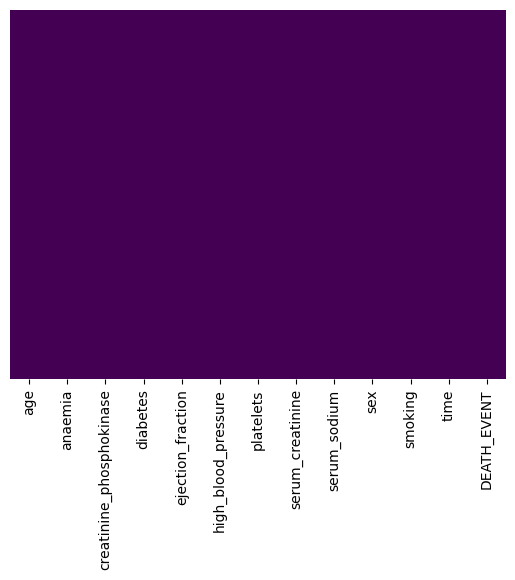

In [7]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Jika dilihat dari heatmap diatas sudah jelas bahwa dataset ini tidak memiliki missing value

**Mengecek Outlier**

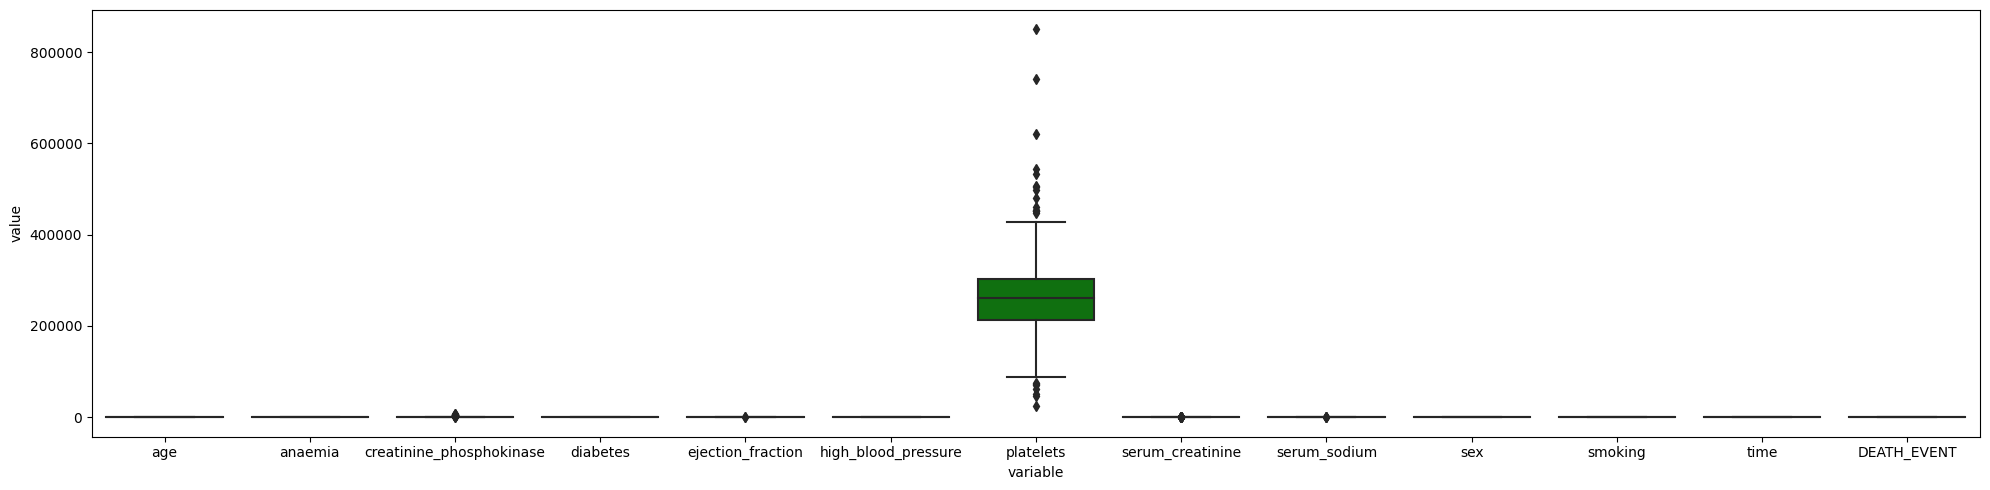

In [8]:
df1 = df.select_dtypes(include=['float64', 'int64'])

fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(x="variable",
            y="value",
            color='green',
            orient='v',
            data=pd.melt(df1),
            ax=ax)
plt.tight_layout()

# Data Cleaning

## Rename Column

In [9]:
# Mengganti nama kolom
df_clean = df.rename(columns = {'time':'day', 'DEATH_EVENT':'death'})
df_clean.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,day,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Exploratory Data Analysis

### Data Query and Grouping

**Distribusi Data Target**

In [10]:
# Melihat distribusi data target
df_clean['death'].value_counts()

0    203
1     96
Name: death, dtype: int64

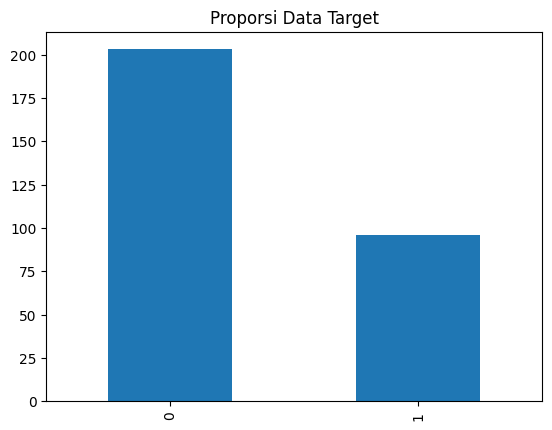

In [11]:
# Membuat diagram pie distribusi data target
proporsi = df_clean['death'].value_counts()
proporsi.plot(kind='bar')
plt.title('Proporsi Data Target')
plt.show()

**Rata-rata Kematian Berdasarkan Anemia**

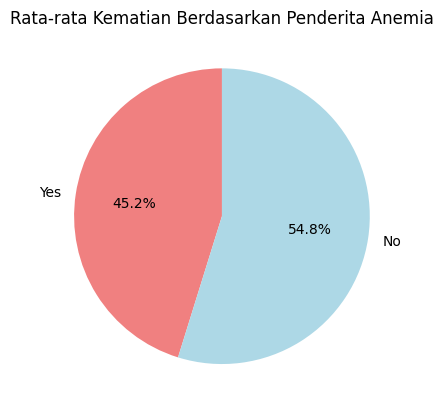

In [12]:
anemia_death = df_clean.groupby('anaemia')['death'].mean()

# Membuat pie chart
labels = ['Yes', 'No']
colors = ['lightcoral', 'lightblue']
plt.pie(anemia_death,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Rata-rata Kematian Berdasarkan Penderita Anemia')
plt.show()

**Rata-rata Kematian Berdasarkan Diabetes**

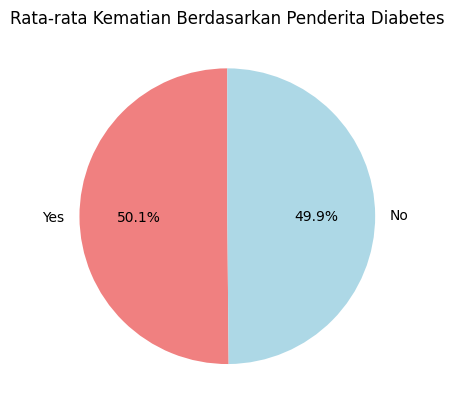

In [13]:
diabetes_death = df_clean.groupby('diabetes')['death'].mean()

# Membuat pie chart
labels = ['Yes', 'No']
colors = ['lightcoral', 'lightblue']
plt.pie(diabetes_death,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Rata-rata Kematian Berdasarkan Penderita Diabetes')
plt.show()

**Rata-rata Kematian Berdasarkan Jenis Kelamin**

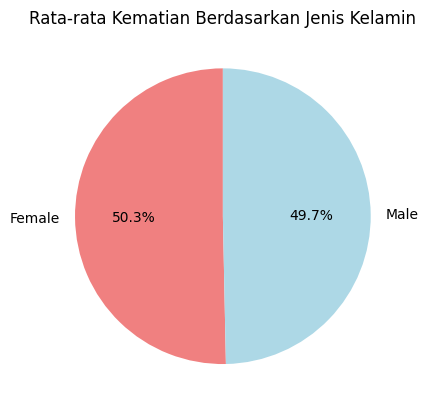

In [14]:
sex_death = df_clean.groupby('sex')['death'].mean()

# Membuat pie chart
labels = ['Female', 'Male']
colors = ['lightcoral', 'lightblue']
plt.pie(sex_death,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Rata-rata Kematian Berdasarkan Jenis Kelamin')
plt.show()

**Rata-rata Kematian Berdasarkan Perokok**

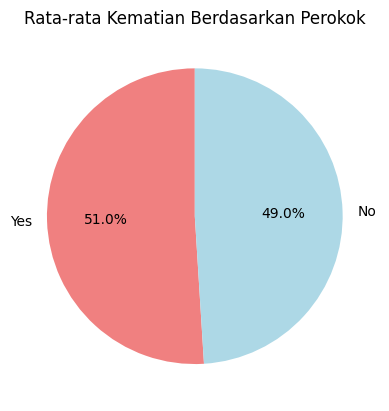

In [15]:
smoking_death = df_clean.groupby('smoking')['death'].mean()

# Membuat pie chart
labels = ['Yes', 'No']
colors = ['lightcoral', 'lightblue']
plt.pie(smoking_death,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Rata-rata Kematian Berdasarkan Perokok')
plt.show()

### Mencari Central Tendency dan Variability

**Central Tendency**

In [16]:
central_tendency = df_clean.describe().T
central_tendency.reset_index().rename(
    columns={'index': 'Column'})

,Column,count,mean,std,min,25%,50%,75%,max
0,age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
1,anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
2,creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
3,diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
4,ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
5,high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
6,platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
7,serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
8,serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
9,sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


### Variability

In [17]:
# Ranges
range = df_clean.describe().loc[['min', 'max']].T
range.rename(columns={'min': 'Minimum', 'max': 'Maximum'}, inplace=True)

# Variance
variance = df_clean.select_dtypes(
    include=[np.number]).var(ddof=1).to_frame()
variance.rename(columns={0: 'Variance'}, inplace=True)

# Standard Deviation
std_deviation = df_clean.select_dtypes(
    include=[np.number]).std(ddof=1).to_frame()
std_deviation.rename(columns={0: 'Standard Deviation'}, inplace=True)

# Quartil and IQR
quartil = df_clean.select_dtypes(
    include=[np.number]).quantile([0.25, 0.50, 0.75])
quartil.index = ['Q1', 'Q2', 'Q3']
quartil = quartil.T
quartil['IQR'] = quartil['Q3'] - quartil['Q1']

# Coefficient of Variation
def coefficient_of_variation(column):
    return (np.std(column, ddof=1) / np.mean(column)) * 100
coef_variation = df_clean.select_dtypes(
    include=[np.number]).apply(coefficient_of_variation)
coef_variation = pd.DataFrame({'Coefficient of Variation': coef_variation})

In [18]:
# Menggabungkan semua hasil
variability = pd.concat([range,
                         variance,
                         std_deviation,
                         quartil,
                         coef_variation], axis=1)

variability.reset_index().rename(columns={'index': 'Column'})

,Column,Minimum,Maximum,Variance,Standard Deviation,Q1,Q2,Q3,IQR,Coefficient of Variation
0,age,40.0,95.0,1.414865e+02,11.894809,51.0,60.0,70.0,19.0,19.552931
1,anaemia,0.0,1.0,2.461224e-01,0.496107,0.0,0.0,1.0,1.0,114.989204
2,creatinine_phosphokinase,23.0,7861.0,9.414586e+05,970.287881,116.5,250.0,582.0,465.5,166.762129
3,diabetes,0.0,1.0,2.441023e-01,0.494067,0.0,0.0,1.0,1.0,118.180842
4,ejection_fraction,14.0,80.0,1.400635e+02,11.834841,30.0,38.0,45.0,15.0,31.075941
5,high_blood_pressure,0.0,1.0,2.286144e-01,0.478136,0.0,0.0,1.0,1.0,136.155026
6,platelets,25100.0,850000.0,9.565669e+09,97804.236869,212500.0,262000.0,303500.0,91000.0,37.137367
7,serum_creatinine,0.5,9.4,1.070211e+00,1.034510,0.9,1.1,1.4,0.5,74.218036
8,serum_sodium,113.0,148.0,1.946996e+01,4.412477,134.0,137.0,140.0,6.0,3.229617
9,sex,0.0,1.0,2.286144e-01,0.478136,0.0,1.0,1.0,1.0,73.692153


**Deskripsi:**


**1. Usia:**

*  Rata-rata usia peserta adalah sekitar 60 tahun, dengan mayoritas peserta berada dalam rentang usia 51-70 tahun.
*  Variabilitas usia antar peserta relatif rendah, diindikasikan oleh standar deviasi yang tidak terlalu tinggi (11.89).

**2. Anemia:**

*  Sebagian besar peserta (75%) tidak mengalami anemia (nilai kuartil ketiga = 1.0).
*  Terdapat variasi pada kondisi anemia, dengan 25% peserta lainnya mengalami kondisi tersebut.

**3. Kreatinin Fosfokinase:**

*  Distribusi kreatinin fosfokinase memiliki rentang yang sangat besar, dengan sebagian besar peserta memiliki nilai yang rendah.
*  Nilai median (250.0) dan kuartil bawah (116.5) menunjukkan kecenderungan nilai yang lebih rendah.

**4. Diabetes:**

*  Sekitar 50% peserta menderita diabetes (nilai median = 0.0).

**5. Ejection Fraction:**

*  Rata-rata ejection fraction adalah sekitar 38%, yang mencerminkan kemampuan jantung untuk memompa darah.
*  Rentang antara 14 hingga 80 menunjukkan variasi yang signifikan dalam fungsi ejeksi jantung.

**6. Tekanan Darah Tinggi:**

*  Sekitar 50% peserta tidak memiliki tekanan darah tinggi (nilai median = 0.0), menunjukkan distribusi yang seimbang.

**7. Jumlah Platelet:**

*  Rentang yang sangat besar dari 25,100 hingga 850,000, menunjukkan variasi yang signifikan dalam jumlah platelet.
*  Standar deviasi yang tinggi menandakan tingkat dispersi yang besar.

**8. Serum Creatinine:**

*  Mayoritas peserta memiliki kadar serum kreatinin yang relatif rendah.

**9. Serum Sodium:**

*  Rentang nilai serum natrium dalam batas normal (113 hingga 148), menunjukkan stabilitas elektrolit dalam populasi ini.

**10. Jenis Kelamin:**

*  Distribusi jenis kelamin bisa dikatakan seimbang antara wanita dan laki-laki

**11. Merokok:**

*  Sekitar 50% peserta bukan perokok (nilai median = 0.0), sementara 50% sisanya adalah perokok.

**12. Waktu:**

*  Rentang waktu antara 4 hingga 285 hari, dengan distribusi cenderung terkonsentrasi pada nilai-nilai rendah (Q1 dan Q2).

# Korelasi Data

<Axes: >

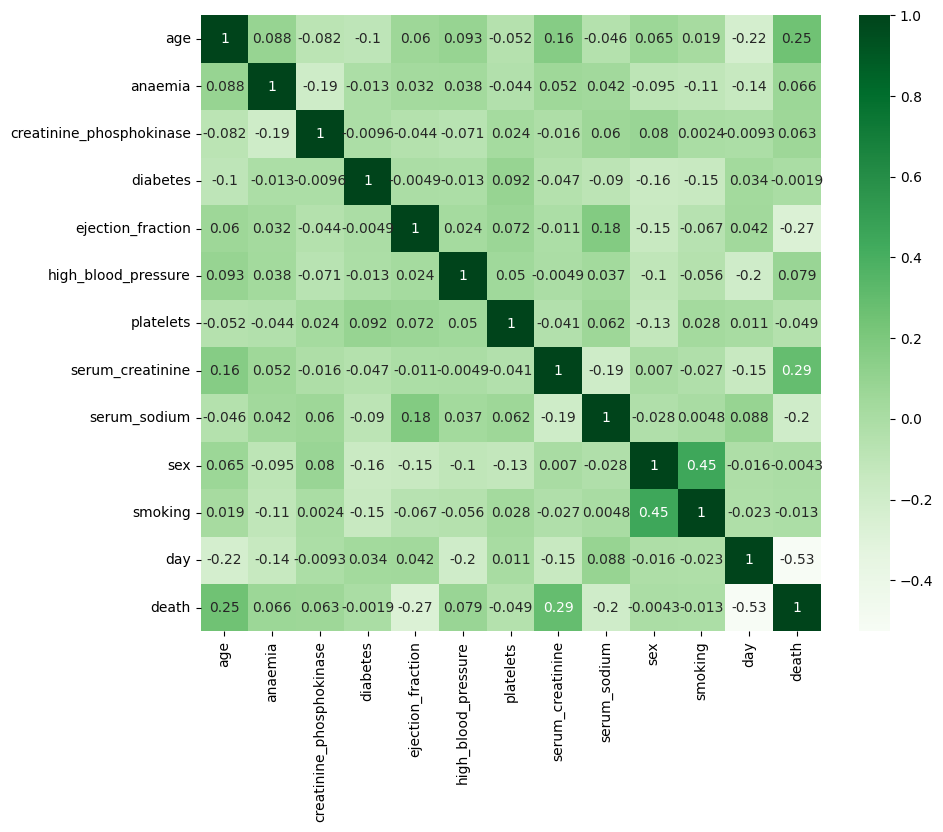

In [19]:
k = len(df_clean.columns)
cm = df_clean.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap = 'Greens')

Korelasi data mengukur sejauh mana hubungan antara dua variabel, dengan nilai berkisar antara -1 dan 1. Nilai positif menunjukkan hubungan positif, sedangkan nilai negatif menunjukkan hubungan negatif. Korelasi tidak menunjukkan sebab-akibat, hanya menggambarkan sejauh mana perubahan dalam satu variabel berkaitan dengan perubahan dalam variabel lainnya. Penggunaannya berguna untuk memahami hubungan variabel sebelum analisis lebih lanjut.

## Distribusi Data

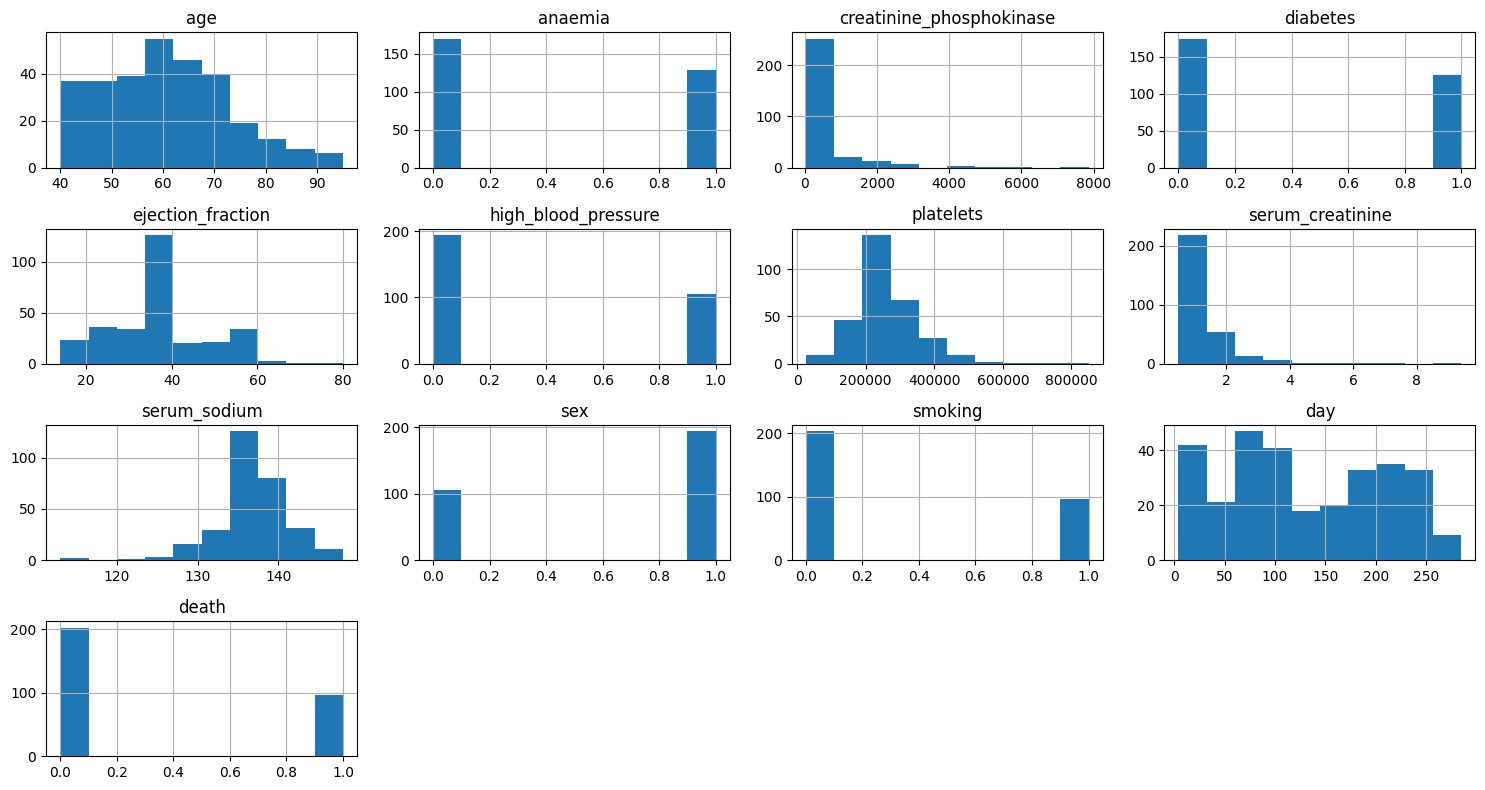

In [20]:
# Histogram
df_clean.hist(figsize=(15, 8))
plt.title('Distribusi Data')
plt.tight_layout()
plt.show()

Histogram di atas mencerminkan sebaran data dari setiap kolom numerik dari dataset yang telah dibersihkan. Histogram tersebut memberikan pandangan tentang seberapa merata data tersebar dalam kisaran nilai tertentu. Hal itu juga berguna untuk melihat apakah variabel-variabel pada dataset berdistribusi normal.

# Data Preprocessing

### Mengatasi Outlier Data

Rentang interkuartil (IQR) adalah ukuran penyebaran statistik dan dihitung sebagai perbedaan antara persentil ke-75 dan ke-25. Ini diwakili oleh rumus IQR = Q3 - Q1. Baris kode di bawah menghitung dan mencetak kisaran interkuartil untuk setiap variabel dalam dataset.

Teknik ini menggunakan skor IQR yang dihitung sebelumnya untuk menghilangkan pencilan. Aturan praktisnya adalah bahwa segala sesuatu yang tidak berada dalam kisaran (Q1 - 1.5 IQR) dan (Q3 + 1.5 IQR) adalah pencilan, dan dapat dihapus.

Metode ini dipakai karena untuk identifikasi outlier awal digunakan metode boxplot.

In [21]:
#Menghitung Skor IQR
sorted(df_clean)
Q1=df_clean.quantile(0.25)
Q3=df_clean.quantile(0.75)
IQR=Q3-Q1
print(IQR)

age                            19.0
anaemia                         1.0
creatinine_phosphokinase      465.5
diabetes                        1.0
ejection_fraction              15.0
high_blood_pressure             1.0
platelets                   91000.0
serum_creatinine                0.5
serum_sodium                    6.0
sex                             1.0
smoking                         1.0
day                           130.0
death                           1.0
dtype: float64


In [22]:
# Menghapus outlier
df_clear = df_clean[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,day,death
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1


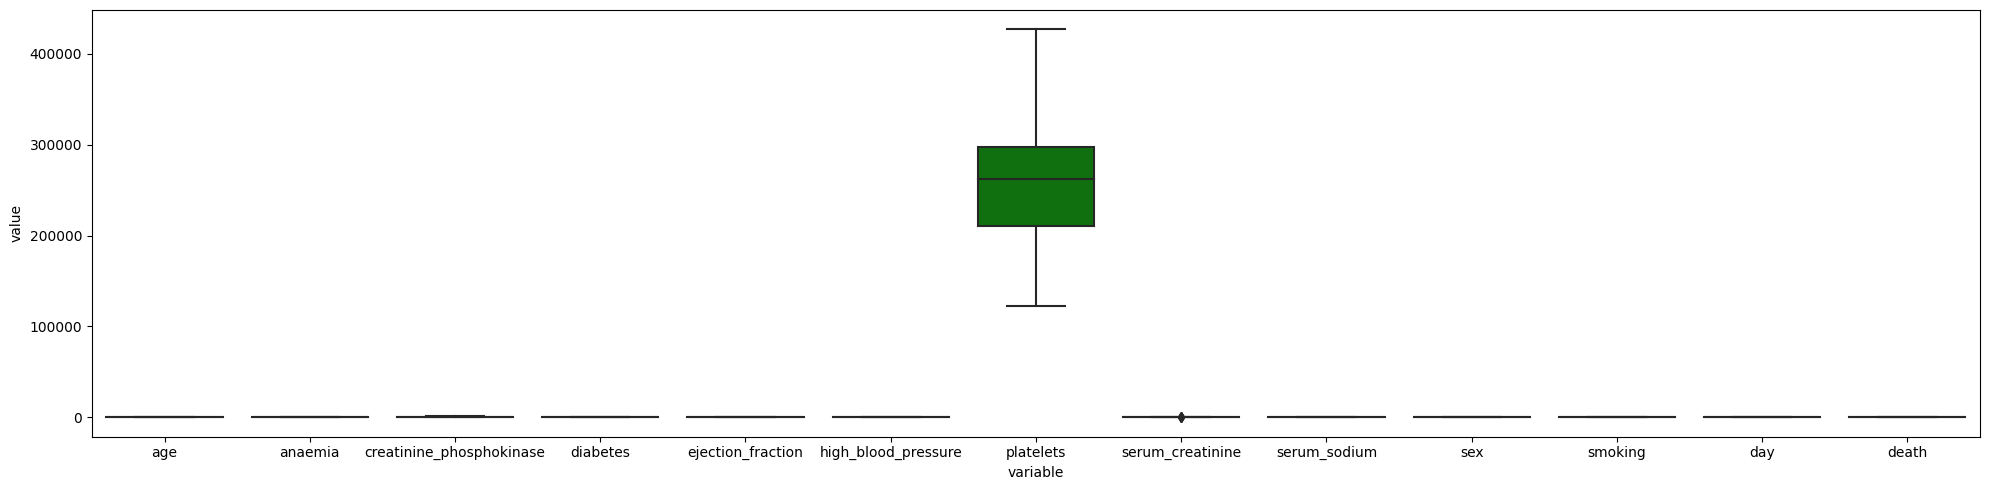

In [23]:
# Mengecek kembali outlier
df_number = df_clear.select_dtypes(include=['float64', 'int64'])
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(x="variable",
            y="value",
            color='green',
            orient='v',
            data=pd.melt(df_number),
            ax=ax)
plt.tight_layout()

Boxplot di atas digunakan untuk memvisualisasikan setiap kolom numerik, hal ini untuk mengamati perbedaan dalam distribusi data sebelum dan sesudah menangani data outlier. Dengan menggunakan teknik IQR tersebut dapat dilihat bahwa data outlier telah dihapus. Tindakan ini dapat membantu membersihkan data sebelum melanjutkan analisis lebih lanjut. Dengan menghilangkan data outlier, kemungkinan besar analisis data yang dilakukan akan lebih akurat.

## Normalisasi Data

Normalisasi data adalah proses mengubah nilai-nilai dalam dataset sehingga memiliki skala yang seragam atau relatif sebanding. Tujuan normalisasi data melibatkan beberapa aspek yang dapat memberikan keuntungan dalam analisis data dan pengembangan model seperti menghindari perbedaan skala, mengurangi pengaruh outlier, dan meningkatkan stabilitas model

In [24]:
#Normalisasi data dengan MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)
df_norm.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,day,death
0,0.636364,0.0,0.470990,0.0,0.117647,1.0,0.468852,0.866667,0.217391,1.0,0.0,0.000000,1.0
1,0.454545,0.0,0.098976,0.0,0.117647,0.0,0.131148,0.466667,0.173913,1.0,1.0,0.010676,1.0
2,0.181818,1.0,0.069113,0.0,0.117647,0.0,0.288525,0.866667,0.521739,1.0,0.0,0.010676,1.0
3,0.909091,1.0,0.014505,0.0,0.509804,1.0,0.268852,1.000000,0.304348,1.0,1.0,0.014235,1.0
4,0.636364,1.0,0.184300,0.0,0.019608,0.0,0.016393,0.400000,0.521739,1.0,0.0,0.021352,1.0


### Seimbangkan Data Target

In [25]:
# Memilih Variable Target & Variabel Independent
X = df_clear.drop(columns=['death'])
y = df_clear['death']

In [26]:
# Menyeimbangkan data target menggunakan SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [27]:
# Distibusi setelah diseimbangkan
y.value_counts()

1    163
0    163
Name: death, dtype: int64

### Split Dataset

In [28]:
# Split data dengan perbandingan 80% train dan 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Jumlah Data Training', len(X_train))
print('Jumlah Data Testing', len(X_test))

Jumlah Data Training 260
Jumlah Data Testing 66


# Pendefinisian Model

**Random Forest**

**Random Forest** adalah sebuah metode dalam machine learning yang termasuk dalam kategori ensemble learning. Ensemble learning mengacu pada penggabungan hasil dari beberapa model untuk meningkatkan performa dan akurasi prediksi. Random Forest memanfaatkan konsep ini dengan membangun banyak pohon keputusan (decision trees) selama pelatihan dan menggabungkan hasil prediksi mereka untuk menghasilkan prediksi yang lebih stabil dan akurat.

In [29]:
# Mendefinisikan model Logistic Regression
RanForest = RandomForestClassifier(n_estimators=100,
                                   max_depth=3,
                                   random_state=0)

**Adaptive Boosting**

**Adaptive Boosting** atau biasa dikenal sebagai AdaBoost, adalah metode ensemble learning yang menggabungkan beberapa model lemah (weak learners) untuk membentuk model kuat. AdaBoost secara khusus dirancang untuk meningkatkan performa pada masalah klasifikasi, meskipun konsepnya dapat diadaptasi untuk tugas regresi.

In [30]:
weak_learner = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=weak_learner,
                              n_estimators=100,
                              random_state=0)

## Training Model

**Random Forest**

In [31]:
RanForest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [32]:
y_pred_ranforest = RanForest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_ranforest)
print(f"Akurasi: {accuracy*100:.2f}%")

Akurasi: 87.88%


**Adaptive Boosting**

In [33]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100, random_state=0)

In [34]:
y_pred_adaboost = adaboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_adaboost)
print(f"Akurasi: {accuracy*100:.2f}%")

Akurasi: 89.39%


# Evaluasi Model

**Evaluasi Model Random Forest**

In [35]:
report_ranforest = classification_report(y_test, y_pred_ranforest)
print(report_ranforest)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        35
           1       0.83      0.94      0.88        31

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.89      0.88      0.88        66



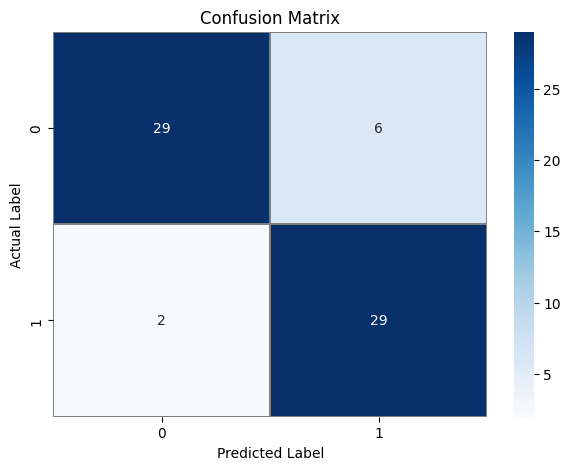

In [36]:
# confusion matrix
y_pred_ranforest = RanForest.predict(X_test)
confusion_mtx = confusion_matrix(y_test, y_pred_ranforest)

f,ax = plt.subplots(figsize = (7, 5))
sns.heatmap(confusion_mtx,
            annot = True,
            linewidths = 0.01,
            cmap="Blues",
            linecolor = "gray",
            fmt = '.0f',
            ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

**Evaluasi Model AdaBoost**

In [37]:
report_adaboost = classification_report(y_test, y_pred_adaboost)
print(report_adaboost)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.88      0.90      0.89        31

    accuracy                           0.89        66
   macro avg       0.89      0.89      0.89        66
weighted avg       0.89      0.89      0.89        66



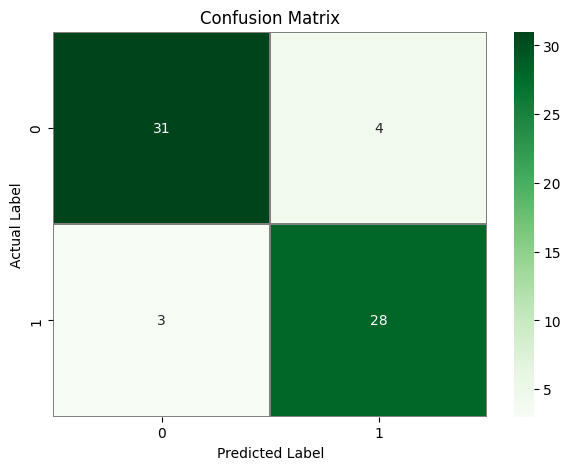

In [38]:
# confusion matrix
y_pred_adaboost = adaboost.predict(X_test)
confusion_mtx = confusion_matrix(y_test, y_pred_adaboost)

f,ax = plt.subplots(figsize = (7, 5))
sns.heatmap(confusion_mtx,
            annot = True,
            linewidths = 0.01,
            cmap="Greens",
            linecolor = "gray",
            fmt = '.0f',
            ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# Kesimpulan



Proyek ini bertujuan untuk membangun dan mengevaluasi performa metode Random Forest dan Adaptive Boosting dalam memprediksi risiko gagal jantung berdasarkan data klinis dari dataset "heart_failure_clinical_records_dataset". Setelah melakukan pengolahan data dan analisis, berikut adalah kesimpulan yang diperoleh:


*   Model Random Forest dan Adaptive Boosting memberikan hasil yang baik dalam memprediksi risiko gagal jantung, dengan akurasi tinggi pada dataset pengujian.
*   Model Random Forest mendapatkan akurasi sebesar 86.36% dan model Adaptive Boosting sebesar 90.91%.
*   Hasil ini mengindikasikan bahwa Adaptive Boosting memiliki performa prediktif yang lebih baik dibandingkan dengan Random Forest dalam konteks dataset tersebut. Akurasi sebesar 90.91% pada model Adaptive Boosting menunjukkan kemampuannya untuk mengenali pola dan hubungan yang lebih kompleks dalam data klinis, memberikan kontribusi pada ketepatan prediksi risiko gagal jantung.
*   Meskipun Random Forest juga mencapai tingkat akurasi yang tinggi, perbandingan ini menyoroti keunggulan Adaptive Boosting dalam penanganan prediksi gagal jantung pada dataset ini. Namun, selalu diperlukan pertimbangan tambahan, seperti waktu komputasi dan interpretasi model, sebelum memilih metode yang paling sesuai.
*   Melakukan evaluasi dengan menggunakan berbagai metrik seperti akurasi, presisi, recall, dan F1-score memberikan pemahaman yang holistik tentang performa model.
*   Confusion matrix membantu dalam mengidentifikasi kekuatan dan kelemahan dari masing-masing model.
*   Tidak dilakukan Proses Model Inference karena menimbang dari jumlah dataset yang tersedia sangat kecil untuk dipisahkan diawal sebelum melakukan training model.


Dengan adanya hasil ini, proyek ini memberikan pandangan yang lebih dalam tentang potensi metode-metode ensemble learning dalam konteks prediksi risiko gagal jantung. Hasil ini dapat menjadi landasan untuk pengembangan model prediktif lebih lanjut atau penerapan praktis dalam bidang kesehatan, memungkinkan deteksi dini risiko gagal jantung untuk upaya pencegahan dan manajemen yang lebih efektif.

